In [1]:
import SOAPify.HDF5er as HDF5er
import SOAPify
import h5py
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Circle
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from multiprocessing.pool import ThreadPool as Pool
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis import Universe as mdaUniverse
from seaborn import kdeplot
from SOAPify.HDF5er import saveXYZfromTrajGroup,MDA2HDF5,saveXYZfromTrajGroup

In [8]:
#1 CREO hdf5 #########################################


#inputs
structFile = "/home/dom/Scaricati/em.gro"
trajFiles = ["/home/dom/Scaricati/npt.xtc"]
select_atoms = 'type P'
u = mda.Universe(structFile,*trajFiles)
selection = u.select_atoms(select_atoms)

name_out = "try"
path_out = "/home/dom/Scaricati"
trajname = "npt__"

hdf5_file = path_out + name_out + ".hdf5"

#CREATE hdf5
HDF5er.MDA2HDF5(u, hdf5_file, trajname, trajChunkSize=100, attrs=None)

[0:100] 100 100 chunk of 904 B
[100:200] 100 100 chunk of 904 B
[200:300] 100 100 chunk of 904 B
[300:400] 100 100 chunk of 904 B
[400:500] 100 100 chunk of 904 B
[500:600] 100 100 chunk of 904 B
[600:700] 100 100 chunk of 904 B
[700:800] 100 100 chunk of 904 B
[800:900] 100 100 chunk of 904 B
[900:1000] 100 100 chunk of 904 B
[1000:1001] 1 1 chunk of 88 B


In [29]:
import MDAnalysis as mda
import h5py

# Load the .gro and .xtc files using MDAnalysis
gro_file = "/home/dom/Scaricati/em_new.gro"
xtc_file = "/home/dom/Scaricati/npt_new.xtc"
trajname="output"
# Create a Universe object
universe = mda.Universe(gro_file, xtc_file)
selection = u.select_atoms('not type H*')

# Define the HDF5 file path
hdf5_file_path = "/home/dom/Scaricati/output_noh_v2.hdf5"

HDF5er.MDA2HDF5(selection, hdf5_file_path, trajname, trajChunkSize=100, attrs=None)

print(f"HDF5 file created at: {hdf5_file_path}")


[0:100] 100 100 chunk of 904 B
[100:200] 100 100 chunk of 904 B
[200:300] 100 100 chunk of 904 B
[300:400] 100 100 chunk of 904 B
[400:500] 100 100 chunk of 904 B
[500:600] 100 100 chunk of 904 B
[600:700] 100 100 chunk of 904 B
[700:800] 100 100 chunk of 904 B
[800:900] 100 100 chunk of 904 B
[900:1000] 100 100 chunk of 904 B
[1000:1001] 1 1 chunk of 88 B
HDF5 file created at: /home/dom/Scaricati/output_noh_v2.hdf5


In [ ]:
xyz="/home/dom/Scaricati/noh.xyz"
# Create a Universe object
universe = mda.Universe(xyz)

# Define the HDF5 file path
hdf5_file_path = "/home/dom/Scaricati/output_noh.hdf5"

HDF5er.MDA2HDF5(universe, hdf5_file_path, trajname, trajChunkSize=100, attrs=None)

print(f"HDF5 file created at: {hdf5_file_path}")

In [16]:
##check dimensions
trajFileName = "/home/dom/Scaricati/output_noh.hdf5"
trajAddress = "/Trajectories/output"
wantedTrajectory = slice(0, None, 1)

with h5py.File(trajFileName, "r") as trajFile:
    tgroup = trajFile[trajAddress]
    universe = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)

nAtoms = len(universe.atoms)
print(nAtoms)
print(np.shape(universe.trajectory))

5219
(1001, 5219, 3)


In [22]:
#esportare roba per visualizzazione

#fetta di traiettoria da prendere
wantedTrajectory = slice(None)
trajAddress = "/Trajectories/output"

def export(wantedTrajectory):
    with h5py.File("/home/dom/Scaricati/output_noh.hdf5", "r") as trajFile, open("noH_new.xyz", "w") as xyzFile:
        tgroup = trajFile[trajAddress]
        ref = HDF5er.createUniverseFromSlice(tgroup, [0])
        nAt = len(ref.atoms)
        ref.add_TopologyAttr("mass", [1] * nAt)
        exportuniverse = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)
        exportuniverse.add_TopologyAttr("mass", [1] * nAt)

    
        HDF5er.getXYZfromMDA(
            xyzFile,
            exportuniverse,
            allFramesProperty='Origin="0 0 0"',
            
        )

        universe.trajectory

export(wantedTrajectory)

In [41]:
import MDAnalysis as mda
import h5py

# Load the .gro and .xtc files using MDAnalysis
gro_file = "/home/dom/Scaricati/em_new.gro"
xtc_file = "/home/dom/Scaricati/npt_new.xtc"
trajname="output"
# Create a Universe object
universe = mda.Universe(gro_file, xtc_file)
selection = u.select_atoms('not type H*')

# Define the HDF5 file path
hdf5_file_path = "/home/dom/Scaricati/output_noh_v2.hdf5"

HDF5er.MDA2HDF5(selection, hdf5_file_path, trajname, trajChunkSize=100, attrs=None)

print(f"HDF5 file created at: {hdf5_file_path}")


##check dimensions
trajFileName = "/home/dom/Scaricati/output_noh_v2.hdf5"
trajAddress = "/Trajectories/output"
wantedTrajectory = slice(0, None, 1)

with h5py.File(trajFileName, "r") as trajFile:
    tgroup = trajFile[trajAddress]
    universe = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)

nAtoms = len(universe.atoms)
print(nAtoms)
print(np.shape(universe.trajectory))

cutoff = 5
neigCounts = SOAPify.analysis.listNeighboursAlongTrajectory(universe,cutOff=cutoff)
LENS, nn, *_ = SOAPify.analysis.neighbourChangeInTime(neigCounts)
np.savez("gigi_cutoff_5_new.npz",LENS)
np.savez("gigi_cutoff_5_NN_new.npz",nn)

/home/dom/.local/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


[0:100] 100 100 chunk of 904 B
[100:200] 100 100 chunk of 904 B
[200:300] 100 100 chunk of 904 B
[300:400] 100 100 chunk of 904 B
[400:500] 100 100 chunk of 904 B
[500:600] 100 100 chunk of 904 B
[600:700] 100 100 chunk of 904 B
[700:800] 100 100 chunk of 904 B
[800:900] 100 100 chunk of 904 B
[900:1000] 100 100 chunk of 904 B
[1000:1001] 1 1 chunk of 88 B
HDF5 file created at: /home/dom/Scaricati/output_noh_v2.hdf5
5219
(1001, 5219, 3)


In [18]:
import numpy as np

# Load the .npz file
npz_file_path = "./gigi_cutoff_7.npz"
data = np.load(npz_file_path)

# Extract the array stored in the .npz file
array_name = data.files[0]
array_data = data[array_name]

# Get some basic information about the array
array_shape = array_data.shape
print(f"Array shape: {array_shape}")

# Analyzing the data
# For example, calculating the mean and standard deviation
mean_values = np.mean(array_data, axis=1)
std_values = np.std(array_data, axis=1)

print(f"Mean values: {mean_values}")
print(f"Standard deviation values: {std_values}")

# Additional analysis as required
# ...


Array shape: (5219, 1001)
Mean values: [0.08967094 0.08948419 0.15683259 ... 0.33734215 0.3332499  0.34049394]
Standard deviation values: [0.02444035 0.02282135 0.03472163 ... 0.0848019  0.08226587 0.08241851]


/tmp/ipykernel_7466/904271689.py:29: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')


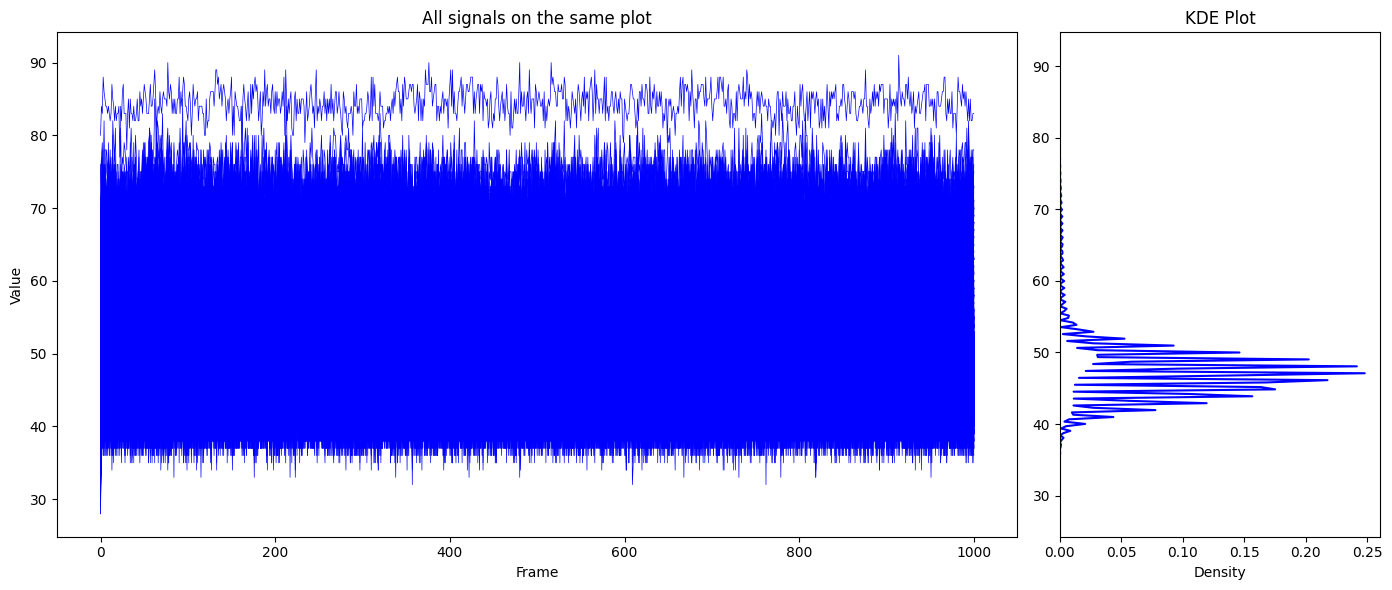

interactive(children=(IntSlider(value=0, description='atom_index', max=5218), Output(layout=Layout(height='400…

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
import ipywidgets as widgets

# Load the .npz file
npz_file_path = "./gigi_cutoff_7_NN.npz"
data = np.load(npz_file_path)

# Extract the array stored in the .npz file
array_name = data.files[0]
array_data = data[array_name]

# Create the combined plot with KDE on the right
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot all signals on the left subplot
for i in range(array_data.shape[0]):
    ax[0].plot(array_data[i], linewidth=0.5, color='blue')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Value')
ax[0].set_title('All signals on the same plot')

# Flatten the data for KDE plot
flattened_data = array_data.flatten()

# Plot KDE on the right subplot
sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')
ax[1].set_xlabel('Density')
ax[1].set_title('KDE Plot')

plt.tight_layout()
plt.show()

# Interactive plot with slider to select the row (atom) to show
def plot_signal(atom_index):
    plt.figure(figsize=(10, 6))
    plt.plot(array_data[atom_index], linewidth=1.5, color='blue')
    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal for Atom {atom_index}')
    plt.show()

interactive_plot = interactive(plot_signal, atom_index=widgets.IntSlider(min=0, max=array_data.shape[0]-1, step=1, value=0))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot



In [30]:
##check dimensions
trajFileName = "/home/dom/Scaricati/output_noh_v2.hdf5"
trajAddress = "/Trajectories/output"
wantedTrajectory = slice(0, None, 1)

with h5py.File(trajFileName, "r") as trajFile:
    tgroup = trajFile[trajAddress]
    universe = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)

nAtoms = len(universe.atoms)
print(nAtoms)
print(np.shape(universe.trajectory))

5219
(1001, 5219, 3)


In [31]:
#fetta di traiettoria da prendere
wantedTrajectory = slice(None)
trajAddress = "/Trajectories/output"

def export(wantedTrajectory):
    with h5py.File("/home/dom/Scaricati/output_noh_v2.hdf5", "r") as trajFile, open("noH_new_version2.xyz", "w") as xyzFile:
        tgroup = trajFile[trajAddress]
        ref = HDF5er.createUniverseFromSlice(tgroup, [0])
        nAt = len(ref.atoms)
        ref.add_TopologyAttr("mass", [1] * nAt)
        exportuniverse = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)
        exportuniverse.add_TopologyAttr("mass", [1] * nAt)

    
        HDF5er.getXYZfromMDA(
            xyzFile,
            exportuniverse,
            allFramesProperty='Origin="0 0 0"',
            
        )

        universe.trajectory

export(wantedTrajectory)

In [32]:
cutoff = 7
neigCounts = SOAPify.analysis.listNeighboursAlongTrajectory(universe,cutOff=cutoff)
LENS, nn, *_ = SOAPify.analysis.neighbourChangeInTime(neigCounts)
np.savez("gigi_cutoff_7_new.npz",LENS)
np.savez("gigi_cutoff_7_NN_new.npz",nn)

/tmp/ipykernel_7466/2025496295.py:29: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')


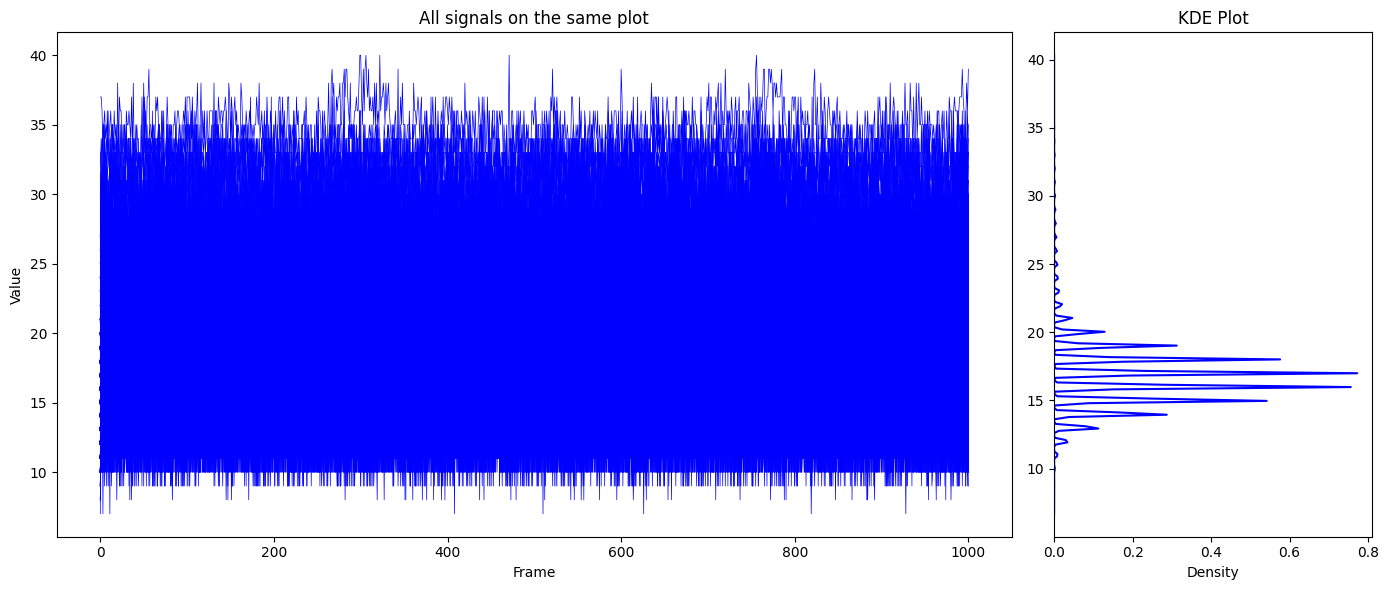

interactive(children=(IntSlider(value=0, description='atom_index', max=5218), Output(layout=Layout(height='400…

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
import ipywidgets as widgets

# Load the .npz file
npz_file_path = "./gigi_cutoff_5_NN.npz"
data = np.load(npz_file_path)

# Extract the array stored in the .npz file
array_name = data.files[0]
array_data = data[array_name]

# Create the combined plot with KDE on the right
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot all signals on the left subplot
for i in range(array_data.shape[0]):
    ax[0].plot(array_data[i], linewidth=0.5, color='blue')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Value')
ax[0].set_title('All signals on the same plot')

# Flatten the data for KDE plot
flattened_data = array_data.flatten()

# Plot KDE on the right subplot
sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')
ax[1].set_xlabel('Density')
ax[1].set_title('KDE Plot')

plt.tight_layout()
plt.show()

# Interactive plot with slider to select the row (atom) to show
def plot_signal(atom_index):
    plt.figure(figsize=(10, 6))
    plt.plot(array_data[atom_index], linewidth=1.5, color='blue')
    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal for Atom {atom_index}')
    plt.show()

interactive_plot = interactive(plot_signal, atom_index=widgets.IntSlider(min=0, max=array_data.shape[0]-1, step=1, value=0))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

/tmp/ipykernel_7466/3842825861.py:28: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')


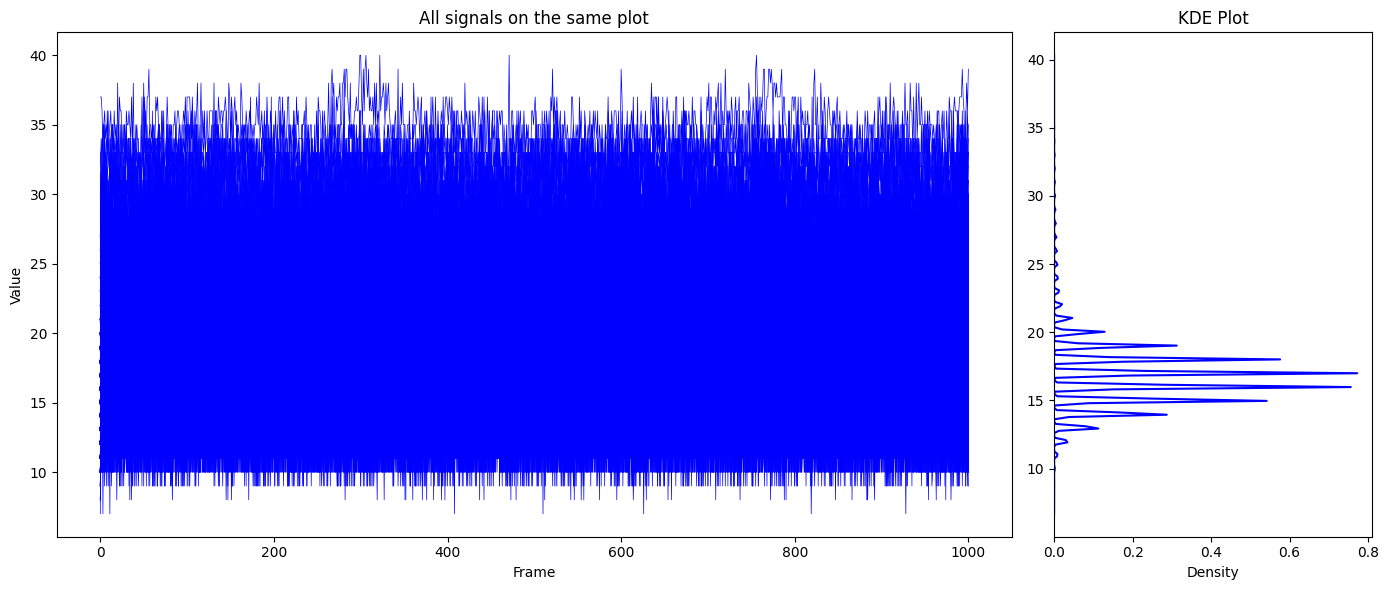

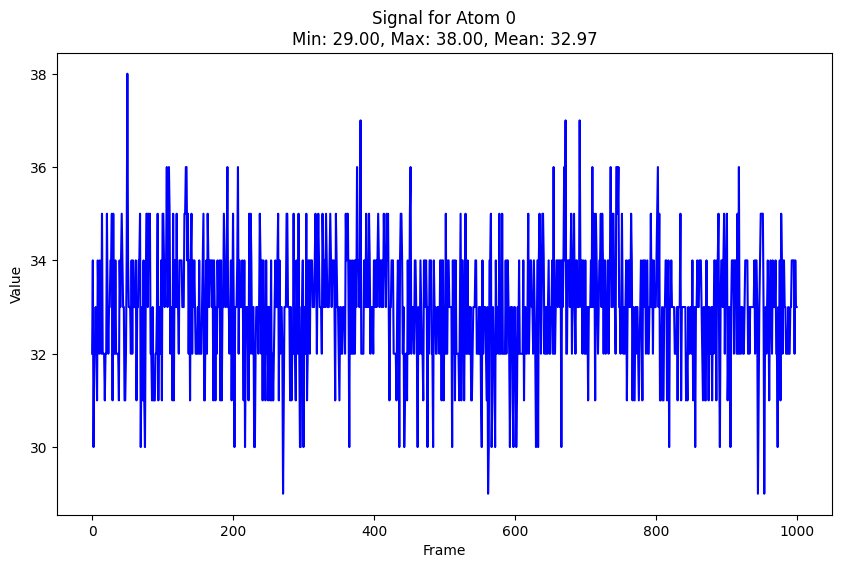

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive, VBox, HBox, Label, IntSlider

# Load the .npz file
npz_file_path = "./gigi_cutoff_5_NN.npz"
data = np.load(npz_file_path)

# Extract the array stored in the .npz file
array_name = data.files[0]
array_data = data[array_name]

# Create the combined plot with KDE on the right
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot all signals on the left subplot
for i in range(array_data.shape[0]):
    ax[0].plot(array_data[i], linewidth=0.5, color='blue')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Value')
ax[0].set_title('All signals on the same plot')

# Flatten the data for KDE plot
flattened_data = array_data.flatten()

# Plot KDE on the right subplot
sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')
ax[1].set_xlabel('Density')
ax[1].set_title('KDE Plot')

plt.tight_layout()
plt.show()

# Interactive plot with slider to select the row (atom) to show
def plot_signal(atom_index):
    signal = array_data[atom_index]
    min_val = np.min(signal)
    max_val = np.max(signal)
    mean_val = np.mean(signal)
    
    plt.figure(figsize=(10, 6))
    plt.plot(signal, linewidth=1.5, color='blue')
    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal for Atom {atom_index}\nMin: {min_val:.2f}, Max: {max_val:.2f}, Mean: {mean_val:.2f}')
    plt.show()

    # Update statistics
    min_label.value = f"Min: {min_val:.2f}"
    max_label.value = f"Max: {max_val:.2f}"
    mean_label.value = f"Mean: {mean_val:.2f}"

# Create interactive widgets
atom_slider = IntSlider(min=0, max=array_data.shape[0]-1, step=1, value=0)
min_label = Label()
max_label = Label()
mean_label = Label()

interactive_plot = interactive(plot_signal, atom_index=atom_slider)

# Arrange widgets in a vertical box
ui = VBox([HBox([atom_slider]), HBox([min_label, max_label, mean_label]), interactive_plot])

# Initialize plot
plot_signal(0)

ui


/tmp/ipykernel_7466/1614969234.py:28: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')


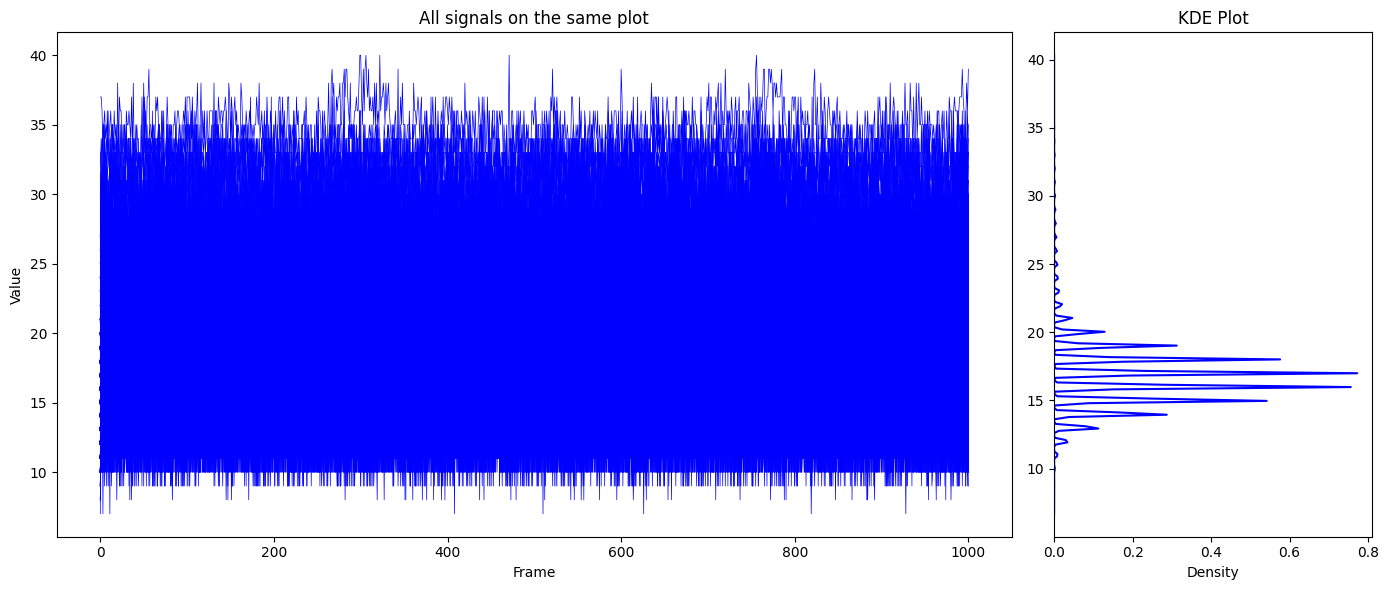

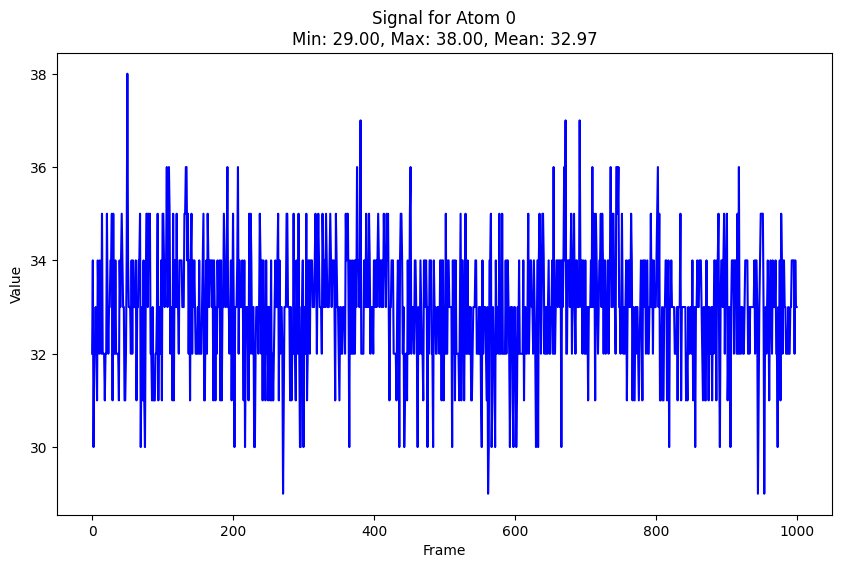

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive, VBox, HBox, Label, IntSlider

# Load the .npz file
npz_file_path = "./gigi_cutoff_5_NN_new.npz"
data = np.load(npz_file_path)

# Extract the array stored in the .npz file
array_name = data.files[0]
array_data = data[array_name]

# Create the combined plot with KDE on the right
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot all signals on the left subplot
for i in range(array_data.shape[0]):
    ax[0].plot(array_data[i], linewidth=0.5, color='blue')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Value')
ax[0].set_title('All signals on the same plot')

# Flatten the data for KDE plot
flattened_data = array_data.flatten()

# Plot KDE on the right subplot
sns.kdeplot(flattened_data, ax=ax[1], vertical=True, color='blue')
ax[1].set_xlabel('Density')
ax[1].set_title('KDE Plot')

plt.tight_layout()
plt.show()

# Interactive plot with slider to select the row (atom) to show
def plot_signal(atom_index):
    signal = array_data[atom_index]
    min_val = np.min(signal)
    max_val = np.max(signal)
    mean_val = np.mean(signal)
    
    plt.figure(figsize=(10, 6))
    plt.plot(signal, linewidth=1.5, color='blue')
    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal for Atom {atom_index}\nMin: {min_val:.2f}, Max: {max_val:.2f}, Mean: {mean_val:.2f}')
    plt.show()

    # Update statistics
    min_label.value = f"Min: {min_val:.2f}"
    max_label.value = f"Max: {max_val:.2f}"
    mean_label.value = f"Mean: {mean_val:.2f}"

# Create interactive widgets
atom_slider = IntSlider(min=0, max=array_data.shape[0]-1, step=1, value=0)
min_label = Label()
max_label = Label()
mean_label = Label()

interactive_plot = interactive(plot_signal, atom_index=atom_slider)

# Arrange widgets in a vertical box
ui = VBox([HBox([atom_slider]), HBox([min_label, max_label, mean_label]), interactive_plot])

# Initialize plot
plot_signal(0)

ui

In [ ]:
import MDAnalysis as mda
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import filecmp

def compare_files(file1, file2):
    return os.path.exists(file1) and os.path.exists(file2) and filecmp.cmp(file1, file2)

def create_universe_and_hdf5(gro_file, xtc_file, hdf5_file_path, trajname):
    universe = mda.Universe(gro_file, xtc_file)
    selection = universe.select_atoms('not type H*')
    HDF5er.MDA2HDF5(selection, hdf5_file_path, trajname, trajChunkSize=100, attrs=None)
    print(f"HDF5 file created at: {hdf5_file_path}")
    return hdf5_file_path

def check_hdf5_difference(hdf5_file1, hdf5_file2):
    with h5py.File(hdf5_file1, "r") as file1, h5py.File(hdf5_file2, "r") as file2:
        for key in file1.keys():
            if key not in file2 or not np.array_equal(file1[key], file2[key]):
                return True
    return False

def compute_lens_nn(hdf5_file_path, trajname, cutoff):
    trajAddress = f"/Trajectories/{trajname}"
    wantedTrajectory = slice(0, None, 1)

    with h5py.File(hdf5_file_path, "r") as trajFile:
        tgroup = trajFile[trajAddress]
        universe = HDF5er.createUniverseFromSlice(tgroup, wantedTrajectory)

    neigCounts = SOAPify.analysis.listNeighboursAlongTrajectory(universe, cutOff=cutoff)
    LENS, nn, *_ = SOAPify.analysis.neighbourChangeInTime(neigCounts)
    return LENS, nn


def plot_signals(nn_file1, nn_file2, atom_index):
    nn1 = np.load(nn_file1)['arr_0']
    nn2 = np.load(nn_file2)['arr_0']

    # Compute min, max, and mean values for both signals
    min1, max1, mean1 = np.min(nn1[atom_index]), np.max(nn1[atom_index]), np.mean(nn1[atom_index])
    min2, max2, mean2 = np.min(nn2[atom_index]), np.max(nn2[atom_index]), np.mean(nn2[atom_index])

    plt.figure(figsize=(10, 6))
    #plt.scatter(np.arange(len(nn1[atom_index])), nn1[atom_index], label=f'NN1 Atom {atom_index}', s=2)
    #plt.scatter(np.arange(len(nn2[atom_index])), nn2[atom_index], label=f'NN2 Atom {atom_index}', s=2)

    plt.plot(np.arange(len(nn1[atom_index])), nn1[atom_index], label=f'NN1 Atom {atom_index}')
    plt.plot(np.arange(len(nn2[atom_index])), nn2[atom_index], label=f'NN2 Atom {atom_index}')

    # Add text annotations for min, max, and mean
    plt.text(0.01, 0.95, f'NN1 - Min: {min1:.2f}, Max: {max1:.2f}, Mean: {mean1:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
    plt.text(0.01, 0.90, f'NN2 - Min: {min2:.2f}, Max: {max2:.2f}, Mean: {mean2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal Comparison for Atom {atom_index}')
    plt.legend()
    plt.show()

# Define file paths
gro_file1 = "/home/dom/Scaricati/em_new.gro"
xtc_file1 = "/home/dom/Scaricati/npt_new.xtc"
gro_file2 = "/home/dom/Scaricati/em.gro"
xtc_file2 = "/home/dom/Scaricati/npt.xtc"

if compare_files(gro_file1, gro_file2) or compare_files(xtc_file1, xtc_file2):
    raise ValueError("The gro or xtc files are identical, which is a problem.")

# Create HDF5 files
hdf5_file1 = "/home/dom/Scaricati/output1_noh_v2.hdf5"
hdf5_file2 = "/home/dom/Scaricati/output2_noh_v2.hdf5"
trajname1 = "output1"
trajname2 = "output2"

create_universe_and_hdf5(gro_file1, xtc_file1, hdf5_file1, trajname1)
create_universe_and_hdf5(gro_file2, xtc_file2, hdf5_file2, trajname2)

if not check_hdf5_difference(hdf5_file1, hdf5_file2):
    raise ValueError("The HDF5 files are identical, which is a problem.")

# Compute LENS and NN npz files
cutoff = 5
LENS1, nn1 = compute_lens_nn(hdf5_file1, trajname1, cutoff)
LENS2, nn2 = compute_lens_nn(hdf5_file2, trajname2, cutoff)

np.savez("gigi_cutoff_5_LENS.npz", LENS1)
np.savez("gigi_cutoff_5_NN_1.npz", nn1)
np.savez("gigi_cutoff_5_LENS2.npz", LENS2)
np.savez("gigi_cutoff_5_NN_2.npz", nn2)

# Plot signals for atom 0 and atom 1
plot_signals("gigi_cutoff_5_NN_1.npz", "gigi_cutoff_5_NN_2.npz", 0)
plot_signals("gigi_cutoff_5_NN_1.npz", "gigi_cutoff_5_NN_2.npz", 1)

plot_signals("gigi_cutoff_5_LENS.npz", "gigi_cutoff_5_LENS2.npz", 0)
plot_signals("gigi_cutoff_5_LENS.npz", "gigi_cutoff_5_LENS2.npz", 1)


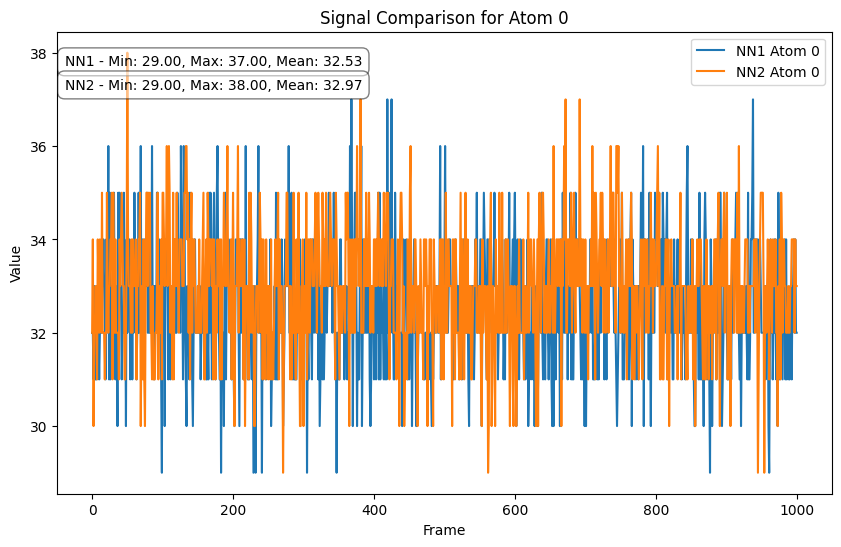

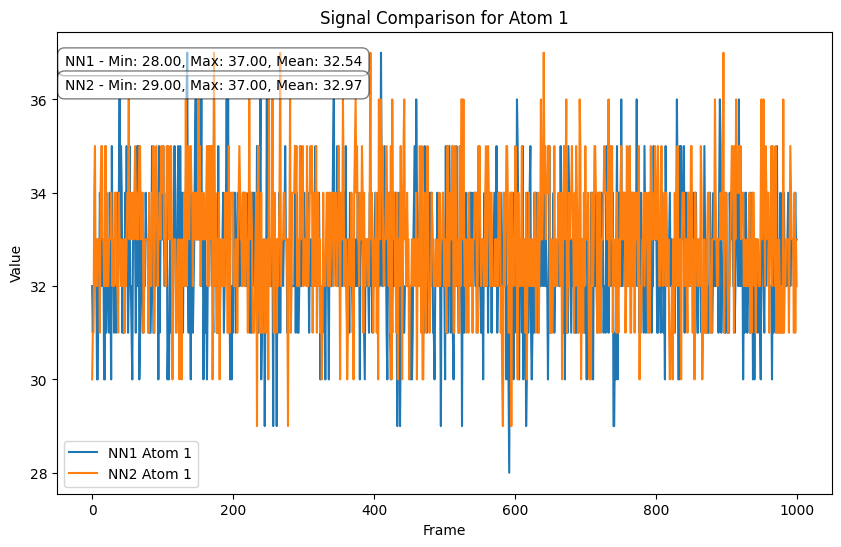

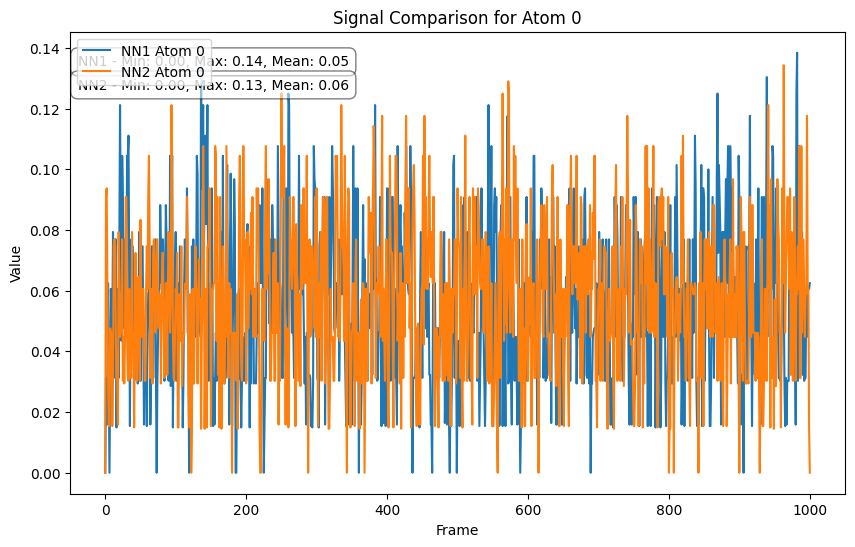

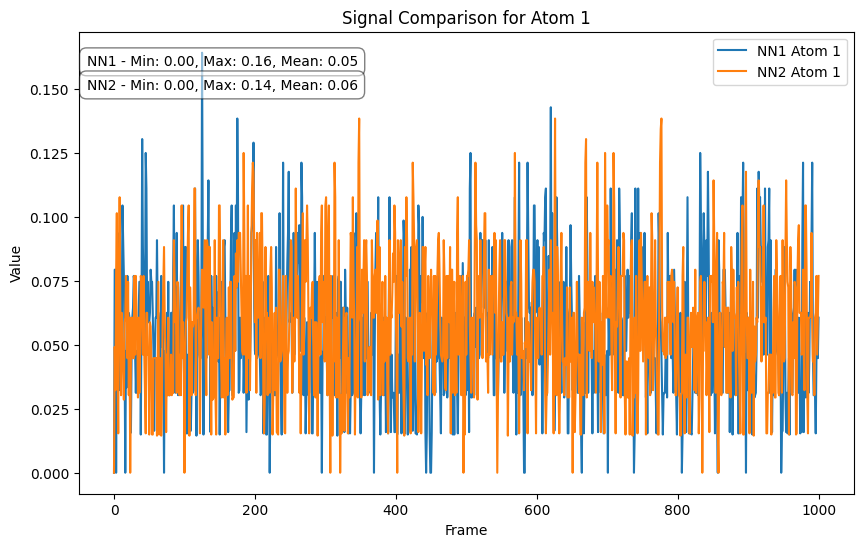

In [52]:
from scipy.interpolate import UnivariateSpline


def plot_signals(nn_file1, nn_file2, atom_index):
    nn1 = np.load(nn_file1)['arr_0']
    nn2 = np.load(nn_file2)['arr_0']

    # Compute min, max, and mean values for both signals
    min1, max1, mean1 = np.min(nn1[atom_index]), np.max(nn1[atom_index]), np.mean(nn1[atom_index])
    min2, max2, mean2 = np.min(nn2[atom_index]), np.max(nn2[atom_index]), np.mean(nn2[atom_index])

    plt.figure(figsize=(10, 6))
    #plt.scatter(np.arange(len(nn1[atom_index])), nn1[atom_index], label=f'NN1 Atom {atom_index}', s=2)
    #plt.scatter(np.arange(len(nn2[atom_index])), nn2[atom_index], label=f'NN2 Atom {atom_index}', s=2)

    plt.plot(np.arange(len(nn1[atom_index])), nn1[atom_index], label=f'NN1 Atom {atom_index}')
    plt.plot(np.arange(len(nn2[atom_index])), nn2[atom_index], label=f'NN2 Atom {atom_index}')

    # Add text annotations for min, max, and mean
    plt.text(0.01, 0.95, f'NN1 - Min: {min1:.2f}, Max: {max1:.2f}, Mean: {mean1:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
    plt.text(0.01, 0.90, f'NN2 - Min: {min2:.2f}, Max: {max2:.2f}, Mean: {mean2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

    plt.xlabel('Frame')
    plt.ylabel('Value')
    plt.title(f'Signal Comparison for Atom {atom_index}')
    plt.legend()
    plt.show()

# Plot signals for atom 0 and atom 1
plot_signals("gigi_cutoff_5_NN_1.npz", "gigi_cutoff_5_NN_2.npz", 0)
plot_signals("gigi_cutoff_5_NN_1.npz", "gigi_cutoff_5_NN_2.npz", 1)

plot_signals("gigi_cutoff_5_LENS.npz", "gigi_cutoff_5_LENS2.npz", 0)
plot_signals("gigi_cutoff_5_LENS.npz", "gigi_cutoff_5_LENS2.npz", 1)

[0:100] 100 100 chunk of 904 B
[100:200] 100 100 chunk of 904 B
[200:300] 100 100 chunk of 904 B
[300:400] 100 100 chunk of 904 B
[400:500] 100 100 chunk of 904 B
[500:600] 100 100 chunk of 904 B
[600:700] 100 100 chunk of 904 B
[700:800] 100 100 chunk of 904 B
[800:900] 100 100 chunk of 904 B
[900:1000] 100 100 chunk of 904 B
[1000:1001] 1 1 chunk of 88 B
HDF5 file created at: /home/dom/Scaricati/output1_noh_v2.hdf5
[0:100] 100 100 chunk of 904 B
[100:200] 100 100 chunk of 904 B
[200:300] 100 100 chunk of 904 B
[300:400] 100 100 chunk of 904 B
[400:500] 100 100 chunk of 904 B
[500:600] 100 100 chunk of 904 B
[600:700] 100 100 chunk of 904 B
[700:800] 100 100 chunk of 904 B
[800:900] 100 100 chunk of 904 B
[900:1000] 100 100 chunk of 904 B
[1000:1001] 1 1 chunk of 88 B
HDF5 file created at: /home/dom/Scaricati/output2_noh_v2.hdf5


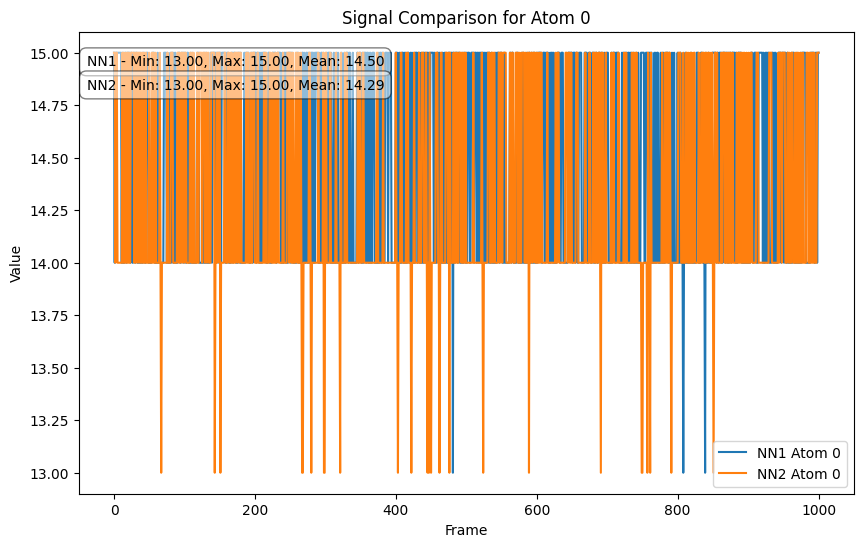

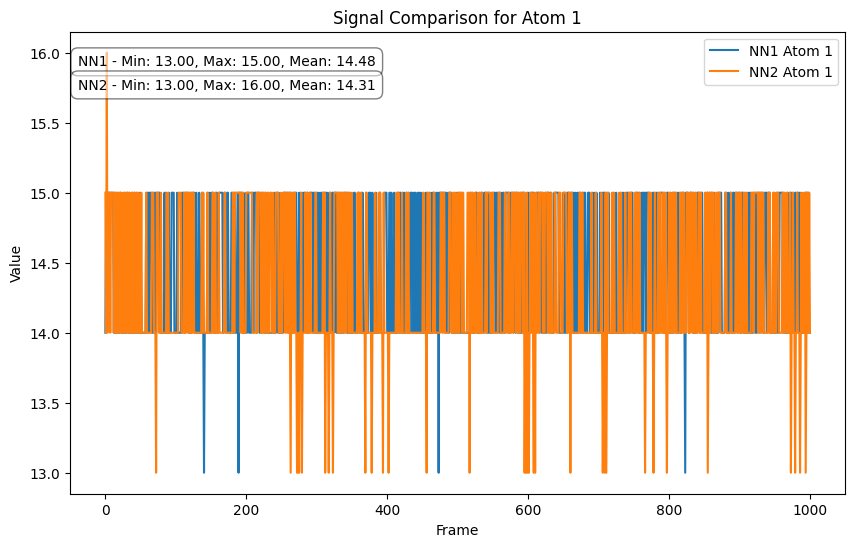

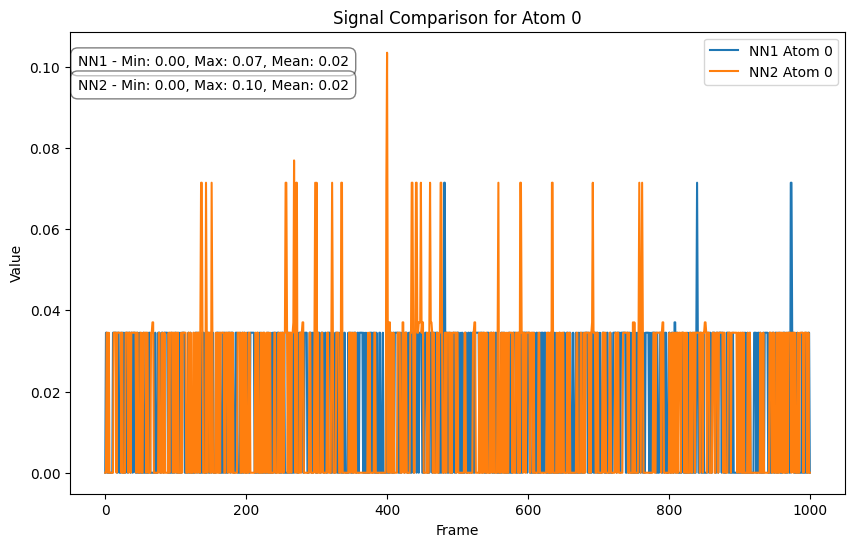

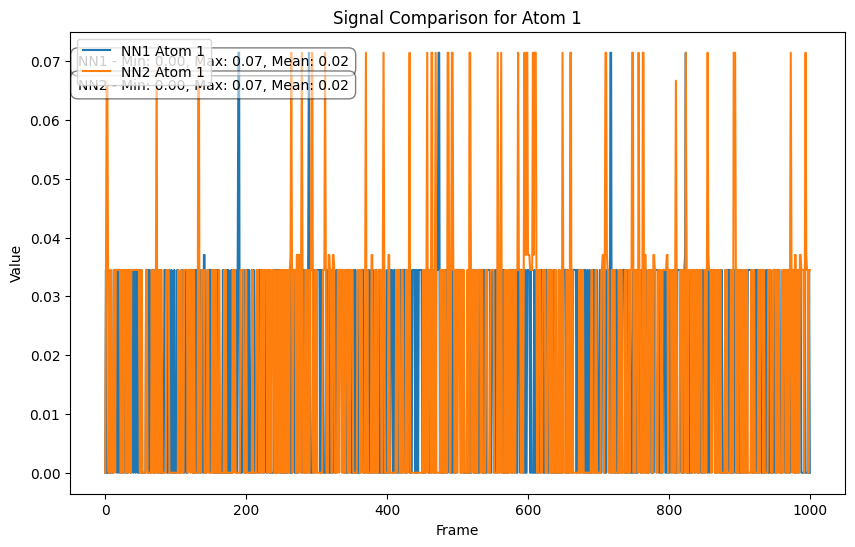

In [53]:

# Define file paths
gro_file1 = "/home/dom/Scaricati/em_new.gro"
xtc_file1 = "/home/dom/Scaricati/npt_new.xtc"
gro_file2 = "/home/dom/Scaricati/em.gro"
xtc_file2 = "/home/dom/Scaricati/npt.xtc"

if compare_files(gro_file1, gro_file2) or compare_files(xtc_file1, xtc_file2):
    raise ValueError("The gro or xtc files are identical, which is a problem.")

# Create HDF5 files
hdf5_file1 = "/home/dom/Scaricati/output1_noh_v2.hdf5"
hdf5_file2 = "/home/dom/Scaricati/output2_noh_v2.hdf5"
trajname1 = "output1"
trajname2 = "output2"

create_universe_and_hdf5(gro_file1, xtc_file1, hdf5_file1, trajname1)
create_universe_and_hdf5(gro_file2, xtc_file2, hdf5_file2, trajname2)

if not check_hdf5_difference(hdf5_file1, hdf5_file2):
    raise ValueError("The HDF5 files are identical, which is a problem.")

# Compute LENS and NN npz files
cutoff = 3.5
LENS1, nn1 = compute_lens_nn(hdf5_file1, trajname1, cutoff)
LENS2, nn2 = compute_lens_nn(hdf5_file2, trajname2, cutoff)

np.savez("gigi_cutoff_3.5_LENS.npz", LENS1)
np.savez("gigi_cutoff_3.5_NN_1.npz", nn1)

np.savez("gigi_cutoff_3.5_LENS2.npz", LENS2)
np.savez("gigi_cutoff_3.5_NN_2.npz", nn2)

# Plot signals for atom 0 and atom 1
plot_signals("gigi_cutoff_3.5_NN_1.npz", "gigi_cutoff_3.5_NN_2.npz", 0)
plot_signals("gigi_cutoff_3.5_NN_1.npz", "gigi_cutoff_3.5_NN_2.npz", 1)

plot_signals("gigi_cutoff_3.5_LENS.npz", "gigi_cutoff_3.5_LENS2.npz", 0)
plot_signals("gigi_cutoff_3.5_LENS.npz", "gigi_cutoff_3.5_LENS2.npz", 1)